# Trabajo práctico Nº6

## Transformación de similaridad 

Es similar a la transformación euclideana, pero se agrega un factor de escalado s. Es una **isometría** con un escalado **s**. 

 $x' = H_s \cdot x =
 \begin{bmatrix}
     x' \\  
     y' \\ 
     1 
 \end{bmatrix} =
 \begin{bmatrix}
    \mathbf{sR} & \mathbf{t}\\ 
    \mathbf{0}^{T} & 1
 \end{bmatrix} 
\begin{bmatrix}
     x \\  
     y \\ 
     1 
 \end{bmatrix}
 $

Donde:  

* **R** es la matriz 2x2 de **rotación** y **escalado**

$\begin{bmatrix}
    s\cos(\theta) & s\sin(\theta)\\ 
   -s\sin(\theta) & s\cos(\theta)
 \end{bmatrix}$

* **t** es el vector de **traslación**: 

$\begin{bmatrix}
    t_x\\ 
    t_y
 \end{bmatrix}$


* $H_s$ tiene ahora **4 grados de libertad**, los 2 de traslación, 1 de rotación y uno de escalado 


1.1) Agregamos a la función de transformación Euclideana anterior, un parámetro de escalado 

* img: imagen a transformar 
* angle: ángulo de rotación 
* tx: traslación en x 
* ty: traslación en y
* s: factor de esclado 

In [2]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

def SimilTrans(img,angle,tx,ty,s): 
  
    (h,w) = img.shape[0], img.shape[1]
    #H  = np.float32([[np.cos(angle), np.sin(angle), tx], 
                  #-1*[np.sin(angle), np.cos(angle), ty]] )
    
    R = cv2.getRotationMatrix2D((w/2,h/2),angle,scale=s)
    H = np.float32([[R[0][0],R[0][1], tx], 
                    [R[1][0],R[1][1], ty]] )
    
    T = cv2.warpAffine(img,H,(w,h))
    return T
    

1.2) Transformamos la imagen mediante la función 

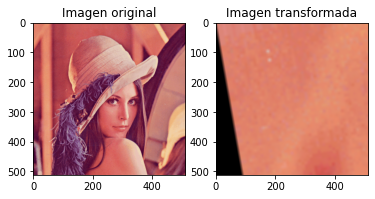

In [3]:
img =cv2.imread("./img/lena.jpeg")                                              
imgT = SimilTrans(img,10,5,5,10)

cv2.imshow("Imagen original",img)
cv2.imshow("Imagen transformada",imgT)
k = cv2.waitKey(0)
cv2.destroyAllWindows() 

plt.figure()
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Imagen transformada")
plt.imshow( cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB))


2) Anexamos esta función al trabajo anterior: 

Con la letra “e” se aplica una transformación euclidiana a la porción de imagen
seleccionada y se guarda como una nueva imagen.

* Agregamos la función que atiene al evento de algun movimiento del mouse y algunas variables globales de control
* Agregamos la función de control de coordenadas finales e iniciales 

In [4]:
                                                                           
def draw (event,x,y,flags,param):                                               
    global ix, iy,fx,fy, drawing, mode                                          
    if event == cv2.EVENT_LBUTTONDOWN:                                          
        drawing = True                                                          
        ix, iy = x,y                                                            
    elif event == cv2.EVENT_MOUSEMOVE:                                          
        if drawing is True:                                                     
            imgSwap[:] = img[:]                                                 
            cv2.rectangle(imgSwap,(ix,iy), (x,y), (0,255,0),1)                  
    elif event == cv2.EVENT_LBUTTONUP:                                          
        drawing = False                                                         
        fx,fy = x,y                                                             
        cv2.rectangle(imgSwap,(ix,iy), (x,y), (0,255,0),1)    
        
def fixedSlice():                                                                     
    global ix,iy,fx,fy                                                          
                                                                                
    if fx < ix:                                                                 
        fx,ix = ix,fx                                                           
    if fy < iy:                                                                 
        fy,iy = iy,fy                                                           
                                                                                
    return img[iy:fy, ix:fx]
      

* Agregamos el menu desde donde se llaman al resto del funcioes

In [7]:
#Variables globales de control                                                  
drawing = False                                                                 
ix, iy = -1, -1                                                                 
fx, fy = -1, -1 

img =cv2.imread("./img/lena.jpeg")                                              
imgSwap =cv2.imread("./img/lena.jpeg")                                          
cv2.namedWindow("Ventana Imagen")                                               
cv2.setMouseCallback("Ventana Imagen",draw)                                     
                                                                                
print(" Opciones :" ,                                                           
            "g : Guardar porción de imagen",                                    
            "r : Limpiar la imagen",                                            
            "s : Transformar la seleccion (Similaridad) ",                                    
            "q : salir " , sep = "\n" )                                         
while(1):                                                                       
    cv2.imshow("Ventana Imagen", imgSwap)                                       
    k = cv2.waitKey(1)                                                          
    if k == ord('q'):                                                           
        break                                                                   
    elif k == ord('g'):                                                         
        cv2.imwrite("./img/imagen_seleccionada.png",fixedSlice())        
    elif k == ord('r'):                                                         
        imgSwap[:] = img[:]                                                     
    elif k == ord('s'):
        s = int(input("Factor de escalado"))
        SelT = SimilTrans(fixedSlice(),10,20,20,s)                       
        cv2.imwrite("./img/sel_transformada.png",SelT)                          
                                                                                
cv2.destroyAllWindows()                         

 Opciones :
g : Guardar porción de imagen
r : Limpiar la imagen
s : Transformar la seleccion (Similaridad) 
q : salir 
Factor de escalado3
